<a href="https://colab.research.google.com/github/victormazevedo/predict-financial-fraud/blob/master/Predict_Financial_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Financial Fraud with Data Science Analysis

![alt text](http://www.fatecrp.edu.br/wp-content/themes/fatecrp/dist/img/logo.png)

This is a final-project destinated to Analise e Densenvolvimento de Sistema's course of Fatec Ribeirão Preto

O seguinte projeto é destinado ao trabalho de conclusão de curso do curso de Análise e Desenvolvimento de Sistemas da Fatec Ribeirão Preto. O tema deste projeto é Detecção Automática de Fraude Financeira utilizando Data Science.

Para isto, utilizarei um [dataset](https://www.kaggle.com/ntnu-testimon/paysim1) presente no site [Kaggle](https://kaggle.com).
Este dataset simula transações realizadas via mobile com base em uma amostra de um mês inteiro, disponibilizado por um grande serviço de banco digital da África. Este mesmo serviço também existe em 14 países.
O dataset disponibilizado no Kaggle representa 1/4 do dataset original.

## Import do dataset



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
!wget 'https://www.dropbox.com/s/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv?dl=0'
df = pd.read_csv('PS_20174392719_1491204439457_log.csv?dl=0')

--2020-04-10 20:35:43--  https://www.dropbox.com/s/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv [following]
--2020-04-10 20:35:43--  https://www.dropbox.com/s/raw/2f2ex1g5gvug9rg/PS_20174392719_1491204439457_log.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce3d0ce1ec247639c423fc26364.dl.dropboxusercontent.com/cd/0/inline/A1k2BFtW57m748ooZ3rRKB614FzmZXYT9jopWa_JsW9GvW3xcIwLOeB2SqJwkbJk5PFNetDmq4_HZ4XT0GE0XxzRL0DH1JOBJMPHWV0LLltk_x5bep1l2Y0MZ1nkPp-y4Xo/file# [following]
--2020-04-10 20:35:43--  https://uce3d0ce1ec247639c423fc26364.dl.dropboxusercontent.com/cd/0/inline/A1k2BFtW57m748ooZ3rRKB614FzmZXYT9j

In [2]:
  df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Explicando cada coluna e seus dados

Ao executar o _info_, conseguimos visualizar

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


Ao executar o comando acima, nota-se que são retornados 6.362.619 registros. Cada coluna representa o seguinte:

* step - mapeia a unidade de tempo no mundo real.

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - total da transação na moeda local.

* nameOrig - cliente que começou a transação.

* oldbalanceOrg - saldo inicial antes da transação.

* newbalanceOrig - saldo final depois da transação.

* nameDest - cliente que recebeu a transação (destinatário/favorecido).

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#verifying if exists null values in dataframe
df.isna().values.any()
df.isna().sum(0).sort_values(ascending = False)

isFlaggedFraud    0
isFraud           0
newBalanceDest    0
oldBalanceDest    0
nameDest          0
newBalanceOrig    0
oldBalanceOrig    0
nameOrig          0
amount            0
type              0
step              0
dtype: int64

## Explorando e Analisando os dados

In [6]:
print("Os tipos de transações fraudulentas são: {} ".format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))
fraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
fraudCashOut = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print("O número de TRANSFERS fraudulentas é: {}".format(len(fraudTransfer)))
print("O número de CASH_OUT(SAQUES) é: {}".format(len(fraudCashOut)))

Os tipos de transações fraudulentas são: ['TRANSFER', 'CASH_OUT'] 
O número de TRANSFERS fraudulentas é: 4097
O número de CASH_OUT(SAQUES) é: 4116


In [7]:
countIsFlaggedFraud = df.loc[(df.isFlaggedFraud == 1)]
print("O número de transações marcadas como isFlaggedFraud é: {} ".format(len(countIsFlaggedFraud)))

print("O tipo de transações que estão flagadas com isFlaggedFraud é: {}".format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))

dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\nValor minimo transacionado quando a flag esta ativa: ${}'.format(dfFlagged.amount.min()))
print('\nValor maximo quando a flag estava inativa: ${}'.format(dfNotFlagged.amount.max()))

O número de transações marcadas como isFlaggedFraud é: 16 
O tipo de transações que estão flagadas com isFlaggedFraud é: ['TRANSFER']

Valor minimo transacionado quando a flag esta ativa: $353874.22

Valor maximo quando a flag estava inativa: $92445516.64


In [8]:
print('\nThe number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and\
 newBalanceDest = 0: {}'.\
format(len(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & \
(dfTransfer.oldBalanceDest == 0) & (dfTransfer.newBalanceDest == 0)])))


The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0: 4158


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


<function matplotlib.pyplot.show>

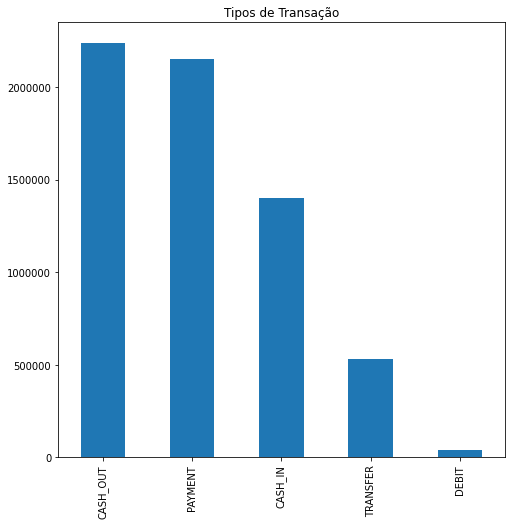

In [9]:
values = df.type.value_counts()
print(values)

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
values.plot(kind='bar', title='Tipos de Transação', ax=ax)
#retirando notação científica
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show

In [25]:
df.head(20)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [30]:
print(f'\nMin e Max da oldBalanceOrig pra flaggedFraud = 1 TRANSFERS {round(dfFlagged.oldBalanceOrig.min()), round(dfFlagged.oldBalanceOrig.max())}')

dfTransferEqualBalance = dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldBalanceOrig == dfTransfer.newBalanceOrig)]
print(f'\nMin e Max da oldBalanceOrig pra flaggedFraud = 0 pra quando oldBalanceOrig \
for igual a newBalanceOrig {round(dfTransferEqualBalance.oldBalanceOrig.min()), round(dfTransferEqualBalance.oldBalanceOrig.max())}')


Min e Max da oldBalanceOrig pra flaggedFraud = 1 TRANSFERS (353874, 19585040)

Min e Max da oldBalanceOrig pra flaggedFraud = 0 pra quando oldBalanceOrig for igual a newBalanceOrig (0, 575668)


In [33]:
print('Checking if amount - oldBalanceOrig == newBalanceOrig')
dfCheckBalance = df.loc[(df.oldBalanceOrig - df.amount) != df.newBalanceOrig]

Checking if amount - oldBalanceOrig == newBalanceOrig


In [34]:
dfCheckBalance.head(5)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0
10,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
13,1,PAYMENT,11633.76,C1716932897,10127.0,0.00,M801569151,0.0,0.00,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0


In [24]:
checkBalance.loc[(checkBalance == False)]

8          False
9          False
10         False
13         False
15         False
           ...  
6362462    False
6362506    False
6362528    False
6362582    False
6362584    False
Length: 5413997, dtype: bool